Import Libraries

In [86]:
import pandas as pd
import random
import calendar
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Generate mock data for case study

In [7]:
# Define categories for merchandise type
categories = ["Clothing Articles", "Shoes", "Hats", "Ladies' Hats", 
              "Men's Fashion", "Women's Fashion"]

# Define age groups
age_groups = ["18-24", "25-34", "35-44", "45-64", "65+"]

# Define regions
regions = ["Northeast", "Midwest", "South", "West"]

# Define income groups
income_groups = ["< $25,000", "$25,000 - $50,000", "$50,000 - $75,000", 
                 "$75,000+"]

# Define languages
languages = ["English", "Spanish", "Other"]

# Define sales trend
monthly_sales = [1000, 1200, 1500, 1800, 2200, 2500, 2800, 3200, 3500, 3800,
                 4200, 4500, 4800, 5200, 5500, 5800, 6200, 6500, 6800, 7000,
                 6800, 6500, 6200, 6000]

# Generate random data
data = []
for month in range(1, 40):  # 3 years of data with 12 months each
    for _ in range(random.randint(100, 200)):  # Random number of customers per month
        # Customer information
        age = random.choice(age_groups)
        region = random.choice(regions)
        income = random.choice(income_groups)
        language = random.choices(languages, weights=[85, 14, 1])[0]
        if random.random() < 0.25:  # 25% chance of missing data
            race_ethnicity = None
        else:
            race_ethnicity = random.choice(["White", "Black or African American", 
                                            "Hispanic or Latino", "Asian", "Native American", "Other"])

        # Generate random sales data with some mislabeled items
        items = []
        for _ in range(random.randint(1, 3)):  # Random number of items per customer
            category = random.choice(categories)
            if age in ["18-24"] and random.random() < 0.1:  # 10% chance of mislabeling
                mislabeled_age = random.choice(age_groups[3:])
                items.append({"Category": category, "Age Group": mislabeled_age})
            else:
                items.append({"Category": category, "Age Group": age})

        data.append({
            "Month": month,
            "Customer ID": f"C{random.randint(1000, 9999)}",
            "Age Group": age,
            "Region": region,
            "Race/Ethnicity": race_ethnicity,
            "Income Group": income,
            "Language": language,
            "Items": items
        })

# Create separate DataFrames for customer and sales data
customer_df = pd.DataFrame(data)[[
    "Customer ID", "Age Group", "Region", "Race/Ethnicity", "Income Group", "Language"
]]
sales_df = pd.DataFrame(data)[[
    "Month", "Customer ID", "Items"
]]

# Unnest the nested list in the "Items" column
sales_df = sales_df.explode("Items")

# Save DataFrames to Excel files
customer_df.to_excel("kleider_apparel_customers.xlsx", index=False)
sales_df.to_excel("kleider_apparel_sales.xlsx", index=False)

print("Successfully generated mock data and saved to Excel files!")

New sales data generation, including dates.

In [8]:
import calendar

# Generate random data
data = []
for month in range(1, 40):
    # Calculate starting and ending dates for the month
    month_start = start_date + timedelta(days=(month - 1) * 31)
    # Ensure month_end doesn't exceed the actual number of days in the month
    month_end = min(month_start + timedelta(days=30), end_date)  # Adjusted line
    
    # Get the number of days in the current month
    num_days_in_month = calendar.monthrange(month_start.year, month_start.month)[1]

    for _ in range(random.randint(100, 200)):  # Random number of customers per month
        # Customer information
        age = random.choice(age_groups)
        region = random.choice(regions)
        income = random.choice(income_groups)
        language = random.choices(languages, weights=[85, 14, 1])[0]
        if random.random() < 0.25:  # 25% chance of missing data
            race_ethnicity = None
        else:
            race_ethnicity = random.choice(["White", "Black or African American", 
                                            "Hispanic or Latino", "Asian", "Native American", "Other"])

        # Generate random sales data with some mislabeled items
        items = []
        for _ in range(random.randint(1, 3)):  # Random number of items per customer
            category = random.choice(categories)
            # Generate random date within the month
            sale_date = random.choice(range(1, num_days_in_month + 1))  # Adjusted line
            sale_date = datetime(month_start.year, month_start.month, sale_date)
            if age in ["18-24"] and random.random() < 0.1:  # 10% chance of mislabeling
                mislabeled_age = random.choice(age_groups[3:])
                items.append({"Category": category, "Age Group": mislabeled_age, "Date": sale_date})
            else:
                items.append({"Category": category, "Age Group": age, "Date": sale_date})

        data.append({
            "Month": month,
            "Customer ID": f"C{random.randint(1000, 9999)}",
            "Age Group": age,
            "Region": region,
            "Race/Ethnicity": race_ethnicity,
            "Income Group": income,
            "Language": language,
            "Items": items
        })

# Create separate DataFrames for customer and sales data
customer_df = pd.DataFrame(data)[[
    "Customer ID", "Age Group", "Region", "Race/Ethnicity", "Income Group", "Language"
]]
sales_df = pd.DataFrame(data)


In [9]:
sales_df 

,Month,Customer ID,Age Group,Region,Race/Ethnicity,Income Group,Language,Items
0,1,C3810,65+,Midwest,Hispanic or Latino,"$50,000 - $75,000",English,"[{'Category': 'Ladies' Hats', 'Age Group': '65..."
1,1,C3602,25-34,West,Native American,"< $25,000",English,"[{'Category': 'Men's Fashion', 'Age Group': '2..."
2,1,C2397,25-34,Northeast,Native American,"< $25,000",English,"[{'Category': 'Ladies' Hats', 'Age Group': '25..."
3,1,C7764,35-44,South,Asian,"$50,000 - $75,000",English,"[{'Category': 'Shoes', 'Age Group': '35-44', '..."
4,1,C7763,18-24,South,None,"$50,000 - $75,000",English,"[{'Category': 'Hats', 'Age Group': '18-24', 'D..."
...,...,...,...,...,...,...,...,...
5913,39,C9606,45-64,South,Native American,"$75,000+",English,"[{'Category': 'Ladies' Hats', 'Age Group': '45..."
5914,39,C7906,18-24,South,White,"< $25,000",English,"[{'Category': 'Ladies' Hats', 'Age Group': '18..."
5915,39,C8224,65+,West,Asian,"$50,000 - $75,000",English,"[{'Category': 'Ladies' Hats', 'Age Group': '65..."
5916,39,C1180,18-24,West,Hispanic or Latino,"$75,000+",English,"[{'Category': 'Hats', 'Age Group': '45-64', 'D..."


Storing the data in an excel file:

In [12]:
# Directory where the Excel file will be saved
directory = 'data'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Full path to the Excel file
file_path = os.path.join(directory, 'kleider_apparel_sales_fixed.xlsx')

# Save the DataFrame to the Excel file
sales_df.to_excel(file_path, index=False)

Let's closely examine the first 5 lines of the 'Items' column

In [13]:
sample_items = sales_df['Items'].head()
print(sample_items)

0    [{'Category': 'Ladies' Hats', 'Age Group': '65...
1    [{'Category': 'Men's Fashion', 'Age Group': '2...
2    [{'Category': 'Ladies' Hats', 'Age Group': '25...
3    [{'Category': 'Shoes', 'Age Group': '35-44', '...
4    [{'Category': 'Hats', 'Age Group': '18-24', 'D...
Name: Items, dtype: object


It seems like the 'Items' column contains lists of dictionaries. Each dictionary represents an item sold, with keys such as 'Category', 'Age Group', and 'Date'. To display a sample of the first 5 lines of the 'Items' column, we will iterate over each list and print its content. 

In [14]:
sample_items = sales_df['Items'].head()

for i, items_list in enumerate(sample_items):
    print(f"Sample for Row {i}:")
    for item in items_list:
        print(item)
    print()

Sample for Row 0:
{'Category': "Ladies' Hats", 'Age Group': '65+', 'Date': datetime.datetime(2021, 1, 26, 0, 0)}
{'Category': 'Clothing Articles', 'Age Group': '65+', 'Date': datetime.datetime(2021, 1, 26, 0, 0)}

Sample for Row 1:
{'Category': "Men's Fashion", 'Age Group': '25-34', 'Date': datetime.datetime(2021, 1, 5, 0, 0)}

Sample for Row 2:
{'Category': "Ladies' Hats", 'Age Group': '25-34', 'Date': datetime.datetime(2021, 1, 31, 0, 0)}
{'Category': 'Hats', 'Age Group': '25-34', 'Date': datetime.datetime(2021, 1, 21, 0, 0)}
{'Category': 'Hats', 'Age Group': '25-34', 'Date': datetime.datetime(2021, 1, 9, 0, 0)}

Sample for Row 3:
{'Category': 'Shoes', 'Age Group': '35-44', 'Date': datetime.datetime(2021, 1, 25, 0, 0)}
{'Category': 'Shoes', 'Age Group': '35-44', 'Date': datetime.datetime(2021, 1, 30, 0, 0)}

Sample for Row 4:
{'Category': 'Hats', 'Age Group': '18-24', 'Date': datetime.datetime(2021, 1, 3, 0, 0)}
{'Category': 'Clothing Articles', 'Age Group': '18-24', 'Date': datetime

To convert the list of dictionaries in the 'Items' column into separate columns in the DataFrame, we will use the pd.json_normalize() function available in pandas. This function is specifically designed to flatten nested JSON structures into a DataFrame.

In [15]:
# Flatten the 'Items' column into separate columns
flattened_items = pd.json_normalize(sales_df['Items'])

# Concatenate the flattened items DataFrame with the original DataFrame, dropping the 'Items' column
sales_df_flat = pd.concat([sales_df.drop(columns=['Items']), flattened_items], axis=1)

# Display the first few rows of the flattened DataFrame
print(sales_df_flat.head())


   Month Customer ID Age Group     Region      Race/Ethnicity  \
0      1       C3810       65+    Midwest  Hispanic or Latino   
1      1       C3602     25-34       West     Native American   
2      1       C2397     25-34  Northeast     Native American   
3      1       C7764     35-44      South               Asian   
4      1       C7763     18-24      South                None   

        Income Group Language  \
0  $50,000 - $75,000  English   
1          < $25,000  English   
2          < $25,000  English   
3  $50,000 - $75,000  English   
4  $50,000 - $75,000  English   

                                                   0  \
0  {'Category': 'Ladies' Hats', 'Age Group': '65+...   
1  {'Category': 'Men's Fashion', 'Age Group': '25...   
2  {'Category': 'Ladies' Hats', 'Age Group': '25-...   
3  {'Category': 'Shoes', 'Age Group': '35-44', 'D...   
4  {'Category': 'Hats', 'Age Group': '18-24', 'Da...   

                                                   1  \
0  {'Category': '

To divide the data from the 'Items' column into separate columns, we need to iterate through the list of dictionaries, extract each key-value pair, and create separate columns for each key

In [16]:
# Initialize empty lists for each column
category_list = []
age_group_list = []
date_list = []

# Iterate through each row in the 'Items' column
for items_list in sales_df['Items']:
    # Initialize empty lists for each row
    category_row = []
    age_group_row = []
    date_row = []
    
    # Iterate through each item dictionary in the list
    for item in items_list:
        # Extract values for each key and append them to the corresponding row list
        category_row.append(item['Category'])
        age_group_row.append(item['Age Group'])
        date_row.append(item['Date'])
    
    # Append the row lists to the respective column lists
    category_list.append(category_row)
    age_group_list.append(age_group_row)
    date_list.append(date_row)

# Create new columns in the DataFrame for each list
sales_df['Category'] = category_list
sales_df['Age Group'] = age_group_list
sales_df['Date'] = date_list

# Drop the original 'Items' column
sales_df.drop(columns=['Items'], inplace=True)

# Display the first few rows of the DataFrame
print(sales_df.head())


   Month Customer ID              Age Group     Region      Race/Ethnicity  \
0      1       C3810             [65+, 65+]    Midwest  Hispanic or Latino   
1      1       C3602                [25-34]       West     Native American   
2      1       C2397  [25-34, 25-34, 25-34]  Northeast     Native American   
3      1       C7764         [35-44, 35-44]      South               Asian   
4      1       C7763  [18-24, 18-24, 18-24]      South                None   

        Income Group Language                           Category  \
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles]   
1          < $25,000  English                    [Men's Fashion]   
2          < $25,000  English         [Ladies' Hats, Hats, Hats]   
3  $50,000 - $75,000  English                     [Shoes, Shoes]   
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes]   

                                                Date  
0         [2021-01-26 00:00:00, 2021-01-26 00:00:00]  
1           

To extract only the first date from each list in the 'Date' column and remove the hour information, we will modify the previous code.

In [17]:
# Extract only the first date from each list and remove the hour information
sales_df['Date'] = sales_df['Date'].apply(lambda x: [date.date() for date in x])
sales_df['Date'] = sales_df['Date'].apply(lambda x: x[0])

# Display the first few rows of the DataFrame
print(sales_df.head())


   Month Customer ID              Age Group     Region      Race/Ethnicity  \
0      1       C3810             [65+, 65+]    Midwest  Hispanic or Latino   
1      1       C3602                [25-34]       West     Native American   
2      1       C2397  [25-34, 25-34, 25-34]  Northeast     Native American   
3      1       C7764         [35-44, 35-44]      South               Asian   
4      1       C7763  [18-24, 18-24, 18-24]      South                None   

        Income Group Language                           Category        Date  
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles]  2021-01-26  
1          < $25,000  English                    [Men's Fashion]  2021-01-05  
2          < $25,000  English         [Ladies' Hats, Hats, Hats]  2021-01-31  
3  $50,000 - $75,000  English                     [Shoes, Shoes]  2021-01-25  
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes]  2021-01-03  


We will now save the sales_df DataFrame as an Excel file named 'kleider_apparel_sales_cleaned.xlsx' in the 'data' folder using the to_excel() method in pandas.

In [18]:
# Directory where the Excel file will be saved
directory = 'data'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Full path to the Excel file
file_path = os.path.join(directory, 'kleider_apparel_sales_cleaned.xlsx')

# Save the DataFrame to the Excel file
sales_df.to_excel(file_path, index=False)


In [19]:
sample_age_group = sales_df['Age Group'].head()
print(sample_age_group)

0               [65+, 65+]
1                  [25-34]
2    [25-34, 25-34, 25-34]
3           [35-44, 35-44]
4    [18-24, 18-24, 18-24]
Name: Age Group, dtype: object


Let's display the first age group from each list, so we modify the output by selecting the first element of each list:

In [20]:
sample_age_group = sales_df['Age Group'].apply(lambda x: x[0] if isinstance(x, list) else x).head()
print(sample_age_group)


0      65+
1    25-34
2    25-34
3    35-44
4    18-24
Name: Age Group, dtype: object


In [22]:
# Replace 'Age Group' column with only the first age group from each list
sales_df['Age Group'] = sales_df['Age Group'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Display the first few rows of the modified DataFrame
print(sales_df.head())

   Month Customer ID Age Group     Region      Race/Ethnicity  \
0      1       C3810       65+    Midwest  Hispanic or Latino   
1      1       C3602     25-34       West     Native American   
2      1       C2397     25-34  Northeast     Native American   
3      1       C7764     35-44      South               Asian   
4      1       C7763     18-24      South                None   

        Income Group Language                           Category        Date  
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles]  2021-01-26  
1          < $25,000  English                    [Men's Fashion]  2021-01-05  
2          < $25,000  English         [Ladies' Hats, Hats, Hats]  2021-01-31  
3  $50,000 - $75,000  English                     [Shoes, Shoes]  2021-01-25  
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes]  2021-01-03  


In [23]:
# Directory where the Excel file will be saved
directory = 'data'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Full path to the Excel file
file_path = os.path.join(directory, 'kleider_apparel_sales_cleaned.xlsx')

# Save the DataFrame to the Excel file
sales_df.to_excel(file_path, index=False)


Let's look at our columns

In [24]:
columns_list = sales_df.columns.tolist()
print(columns_list)

['Month', 'Customer ID', 'Age Group', 'Region', 'Race/Ethnicity', 'Income Group', 'Language', 'Category', 'Date']


In [25]:
sample_categories = sales_df['Category'].apply(lambda x: x[:3] if isinstance(x, list) else x).head()
print(sample_categories)

0    [Ladies' Hats, Clothing Articles]
1                      [Men's Fashion]
2           [Ladies' Hats, Hats, Hats]
3                       [Shoes, Shoes]
4     [Hats, Clothing Articles, Shoes]
Name: Category, dtype: object


In [26]:
# Flatten the 'Category' column to get a list of all categories
all_categories = [category for categories_list in sales_df['Category'] for category in categories_list]

# Get the unique categories
unique_categories = list(set(all_categories))

# Display the list of unique categories
print(unique_categories)


["Women's Fashion", "Men's Fashion", 'Shoes', "Ladies' Hats", 'Clothing Articles', 'Hats']


In [27]:
# Check the shape of the DataFrame
print(sales_df.shape)


(5918, 9)


Our DataFrame has 5918 rows and 9 columns, and the unique categories extracted from the entire DataFrame include:

    "Women's Fashion"
    "Men's Fashion"
    'Shoes'
    "Ladies' Hats"
    'Clothing Articles'
    'Hats'

In [28]:
# Check for repeated Customer IDs
repeated_customer_ids = sales_df['Customer ID'].value_counts()[sales_df['Customer ID'].value_counts() > 1]

# Print the repeated Customer IDs, if any
if repeated_customer_ids.empty:
    print("There are no repeated Customer IDs.")
else:
    print("The following Customer IDs are repeated:")
    print(repeated_customer_ids)

The following Customer IDs are repeated:
Customer ID
C1436    5
C7830    5
C5527    5
C5111    5
C6468    5
        ..
C5806    2
C2397    2
C8875    2
C3554    2
C3841    2
Name: count, Length: 1247, dtype: int64


Let's see if duplicate Customer ID means duplicate information, or repeat customers - the kind we'd like to keep!

In this updated code:

    We use the equals() method to compare rows within the loop. This method checks if two DataFrames are equal.
    We compare rows pairwise within the group of rows with the same Customer ID to check if they are identical duplicates.
    If all rows within the group are identical duplicates, we remove them. Otherwise, we classify them as "repeat customers".

In [32]:
# Step 1: Identify rows with repeated Customer IDs
repeated_customer_ids = sales_df['Customer ID'].value_counts()[sales_df['Customer ID'].value_counts() > 1].index

# Step 2: Process each repeated Customer ID
for customer_id in repeated_customer_ids:
    customer_data = sales_df[sales_df['Customer ID'] == customer_id]
    # Check if all rows with the same Customer ID are identical duplicates
    if customer_data.iloc[0:-1].equals(customer_data.iloc[1:]):
        # Remove identical duplicates
        sales_df = sales_df.drop_duplicates(subset=None, keep='first')
    else:
        # Classify as "repeat customers"
        sales_df.loc[sales_df['Customer ID'] == customer_id, 'Customer Type'] = 'Repeat Customer'

# Display the first few rows of the modified DataFrame
print(sales_df.head())


   Month Customer ID Age Group     Region      Race/Ethnicity  \
0      1       C3810       65+    Midwest  Hispanic or Latino   
1      1       C3602     25-34       West     Native American   
2      1       C2397     25-34  Northeast     Native American   
3      1       C7764     35-44      South               Asian   
4      1       C7763     18-24      South                None   

        Income Group Language                           Category        Date  \
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles]  2021-01-26   
1          < $25,000  English                    [Men's Fashion]  2021-01-05   
2          < $25,000  English         [Ladies' Hats, Hats, Hats]  2021-01-31   
3  $50,000 - $75,000  English                     [Shoes, Shoes]  2021-01-25   
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes]  2021-01-03   

     Customer Type  
0  Repeat Customer  
1              nan  
2  Repeat Customer  
3              nan  
4              nan  


Let's now calculate the number of customers who are repeat customers from the total number of customers

In [33]:
# Count the number of repeat customers
repeat_customers_count = sales_df['Customer Type'].value_counts().get('Repeat Customer', 0)

# Display the number of repeat customers
print("Number of repeat customers:", repeat_customers_count)


Number of repeat customers: 2837


In [34]:
# Count the total number of customers
total_customers_count = sales_df['Customer ID'].nunique()

# Calculate the percentage of repeat customers
percentage_repeat_customers = (repeat_customers_count / total_customers_count) * 100

# Display the results
print("Total number of customers:", total_customers_count)
print("Number of repeat customers:", repeat_customers_count)
print("Percentage of repeat customers from the total:", round(percentage_repeat_customers, 2), "%")


Total number of customers: 4328
Number of repeat customers: 2837
Percentage of repeat customers from the total: 65.55 %


Great! So we have a good part of our clientele that came back at least once after they purchased from us in the past. We shold now look at the trend of repeat customers over time.

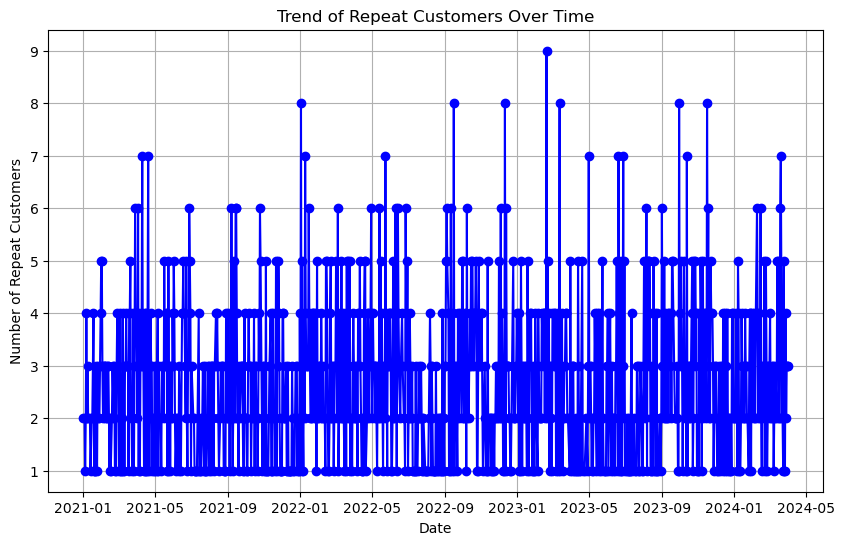

In [36]:
# Filter the DataFrame to include only repeat customers
repeat_customers_df = sales_df[sales_df['Customer Type'] == 'Repeat Customer']

# Count the number of repeat customers for each date
repeat_customers_by_date = repeat_customers_df.groupby('Date').size()

# Plot the trend of repeat customers over time
plt.figure(figsize=(10, 6))
repeat_customers_by_date.plot(kind='line', marker='o', color='b')
plt.title('Trend of Repeat Customers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Repeat Customers')
plt.grid(True)
plt.show()


In [80]:
print(sales_df['Customer Type'].value_counts())

Customer Type
nan                3081
Repeat Customer    2837
Name: count, dtype: int64


In [81]:
sales_df_filtered = sales_df.dropna(subset=['Customer Type'])

Month                0
Customer ID          0
Age Group            0
Region               0
Race/Ethnicity    1499
Income Group         0
Language             0
Category             0
Date                 0
Customer Type        0
dtype: int64
Month                  period[M]
Customer ID               object
Age Group                 object
Region                    object
Race/Ethnicity            object
Income Group              object
Language                  object
Category                  object
Date              datetime64[ns]
Customer Type             object
dtype: object
count        5918
unique         39
top       2023-11
freq          196
Name: Month, dtype: object
Customer Type
nan                3081
Repeat Customer    2837
Name: count, dtype: int64


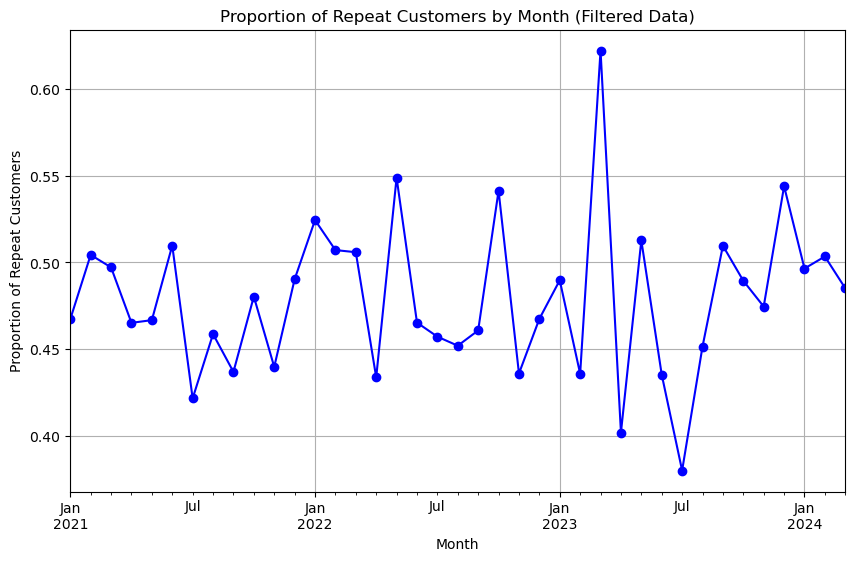

In [83]:

# 'sales_df' is your original DataFrame and you want to filter rows
# where 'Customer Type' isn't missing:
sales_df_filtered = sales_df.dropna(subset=['Customer Type'])

# Check for missing values in 'sales_df_filtered'
print(sales_df_filtered.isnull().sum())  # Check for any remaining missing values

# Check data types of relevant columns
print(sales_df_filtered.dtypes)  # Check data types of 'Month' and 'Customer Type'

# Explore descriptive statistics (optional)
print(sales_df_filtered['Month'].describe())  # Describe 'Month' (if numerical)
print(sales_df_filtered['Customer Type'].value_counts())  # Count occurrences of each value

# Calculate monthly proportion of repeat customers
repeat_customer_prop = (
    sales_df_filtered.groupby('Month')['Customer Type']
    .apply(lambda x: x.eq('Repeat Customer').mean())
)

# Plot the proportion
plt.figure(figsize=(10, 6))
repeat_customer_prop.plot(marker='o', linestyle='-', color='blue')

# Since regression analysis isn't suitable, comment out the line below:
# # This would be incorrect to use with binary data
# # sns.regplot(x='Month', y=repeat_customer_prop, data=sales_df_filtered)

plt.xlabel('Month')
plt.ylabel('Proportion of Repeat Customers')
plt.title('Proportion of Repeat Customers by Month (Filtered Data)')
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [84]:
print(sales_df['Customer Type'].value_counts())

Customer Type
nan                3081
Repeat Customer    2837
Name: count, dtype: int64


In [87]:
sales_df['Repeat Customers'] = np.where(sales_df['Customer Type'] == 'Repeat Customer', 1, 0)
print(sales_df.head())  # Check that the new column has been created

     Month Customer ID Age Group     Region      Race/Ethnicity  \
0  2021-01       C3810       65+    Midwest  Hispanic or Latino   
1  2021-01       C3602     25-34       West     Native American   
2  2021-01       C2397     25-34  Northeast     Native American   
3  2021-01       C7764     35-44      South               Asian   
4  2021-01       C7763     18-24      South                None   

        Income Group Language                           Category       Date  \
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles] 2021-01-26   
1          < $25,000  English                    [Men's Fashion] 2021-01-05   
2          < $25,000  English         [Ladies' Hats, Hats, Hats] 2021-01-31   
3  $50,000 - $75,000  English                     [Shoes, Shoes] 2021-01-25   
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes] 2021-01-03   

     Customer Type  Repeat Customers  
0  Repeat Customer                 1  
1              nan                 0  
2  Re

In [88]:
sales_df.head

<bound method NDFrame.head of         Month Customer ID Age Group     Region      Race/Ethnicity  \
0     2021-01       C3810       65+    Midwest  Hispanic or Latino   
1     2021-01       C3602     25-34       West     Native American   
2     2021-01       C2397     25-34  Northeast     Native American   
3     2021-01       C7764     35-44      South               Asian   
4     2021-01       C7763     18-24      South                None   
...       ...         ...       ...        ...                 ...   
5913  2024-03       C9606     45-64      South     Native American   
5914  2024-03       C7906     18-24      South               White   
5915  2024-03       C8224       65+       West               Asian   
5916  2024-03       C1180     45-64       West  Hispanic or Latino   
5917  2024-03       C3803     25-34  Northeast               White   

           Income Group Language  \
0     $50,000 - $75,000  English   
1             < $25,000  English   
2             < $25,0

In [89]:
columns_list = sales_df.columns.tolist()
print(columns_list)

['Month', 'Customer ID', 'Age Group', 'Region', 'Race/Ethnicity', 'Income Group', 'Language', 'Category', 'Date', 'Customer Type', 'Repeat Customers']


In [90]:
print(sales_df['Category'].head())

0    [Ladies' Hats, Clothing Articles]
1                      [Men's Fashion]
2           [Ladies' Hats, Hats, Hats]
3                       [Shoes, Shoes]
4     [Hats, Clothing Articles, Shoes]
Name: Category, dtype: object


In [91]:
def clean_category(category_list):
    """Extracts the first item before the comma from a list."""
    if not category_list:
        return None  # Handle empty lists
    
    # Split at comma, consider the first item only
    first_item = category_list[0].split(',', 1)[0]
    return first_item

# Apply the cleaning function to the 'Category' column (entire column)
sales_df['Clean Category'] = sales_df['Category'].apply(clean_category)

# Get the unique values in the 'Clean Category' column
unique_categories = sales_df['Clean Category'].unique()

# Print the unique values
print(unique_categories)

["Ladies' Hats" "Men's Fashion" 'Shoes' 'Hats' "Women's Fashion"
 'Clothing Articles']


In [92]:
unique_categories

array(["Ladies' Hats", "Men's Fashion", 'Shoes', 'Hats',
       "Women's Fashion", 'Clothing Articles'], dtype=object)

In [94]:
print(sales_df['Clean Category'].head())

0     Ladies' Hats
1    Men's Fashion
2     Ladies' Hats
3            Shoes
4             Hats
Name: Clean Category, dtype: object


In [95]:
sales_df

,Month,Customer ID,Age Group,Region,Race/Ethnicity,Income Group,Language,Category,Date,Customer Type,Repeat Customers,Clean Category
0,2021-01,C3810,65+,Midwest,Hispanic or Latino,"$50,000 - $75,000",English,"[Ladies' Hats, Clothing Articles]",2021-01-26,Repeat Customer,1,Ladies' Hats
1,2021-01,C3602,25-34,West,Native American,"< $25,000",English,[Men's Fashion],2021-01-05,nan,0,Men's Fashion
2,2021-01,C2397,25-34,Northeast,Native American,"< $25,000",English,"[Ladies' Hats, Hats, Hats]",2021-01-31,Repeat Customer,1,Ladies' Hats
3,2021-01,C7764,35-44,South,Asian,"$50,000 - $75,000",English,"[Shoes, Shoes]",2021-01-25,nan,0,Shoes
4,2021-01,C7763,18-24,South,None,"$50,000 - $75,000",English,"[Hats, Clothing Articles, Shoes]",2021-01-03,nan,0,Hats
...,...,...,...,...,...,...,...,...,...,...,...,...
5913,2024-03,C9606,45-64,South,Native American,"$75,000+",English,"[Ladies' Hats, Women's Fashion, Hats]",2024-03-18,nan,0,Ladies' Hats
5914,2024-03,C7906,18-24,South,White,"< $25,000",English,[Ladies' Hats],2024-03-01,Repeat Customer,1,Ladies' Hats
5915,2024-03,C8224,65+,West,Asian,"$50,000 - $75,000",English,[Ladies' Hats],2024-03-24,Repeat Customer,1,Ladies' Hats
5916,2024-03,C1180,45-64,West,Hispanic or Latino,"$75,000+",English,"[Hats, Ladies' Hats]",2024-03-16,nan,0,Hats


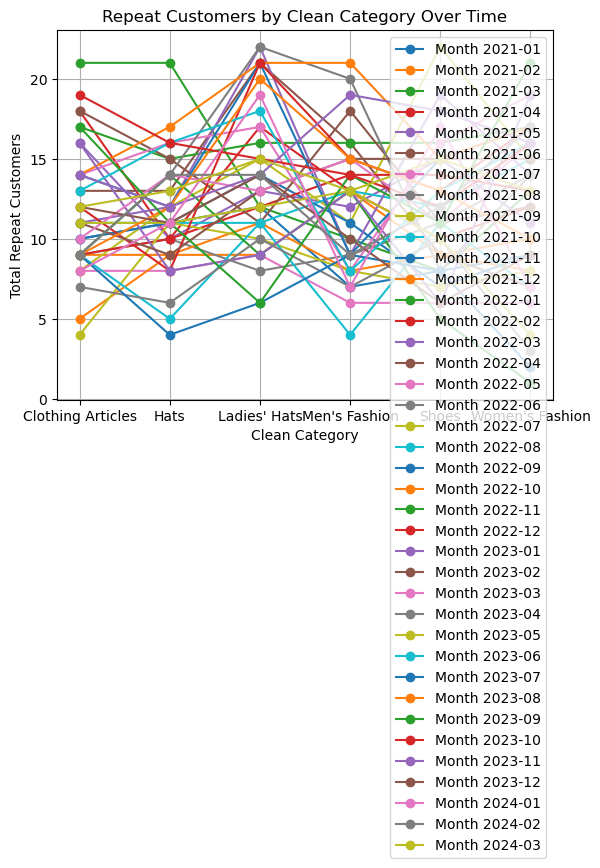

In [96]:
# Group data by 'Month' and 'Clean Category' and calculate the sum of 'Repeat Customers'
repeat_customers_by_category = (
    sales_df.groupby(['Month', 'Clean Category'])['Repeat Customers']
    .sum()
    .reset_index()
)

# Get the unique months
unique_months = sales_df['Month'].unique()

# Define a function to plot the data for each month
def plot_month_data(month):
    data_for_month = repeat_customers_by_category[repeat_customers_by_category['Month'] == month]
    plt.plot(data_for_month['Clean Category'], data_for_month['Repeat Customers'], marker='o', label=f'Month {month}')

# Plot the data for each month
for month in unique_months:
    plot_month_data(month)

# Add labels and title
plt.xlabel('Clean Category')
plt.ylabel('Total Repeat Customers')
plt.title('Repeat Customers by Clean Category Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
repeat_customers_by_month

,level_0,index,Month,0
0,0,0,2021-01-01,57
1,1,1,2021-02-01,59
2,2,2,2021-03-01,85
3,3,3,2021-04-01,80
4,4,4,2021-05-01,77
5,5,5,2021-06-01,79
6,6,6,2021-07-01,43
7,7,7,2021-08-01,61
8,8,8,2021-09-01,83
9,9,9,2021-10-01,73


What item categories have repeat customers bought over time?

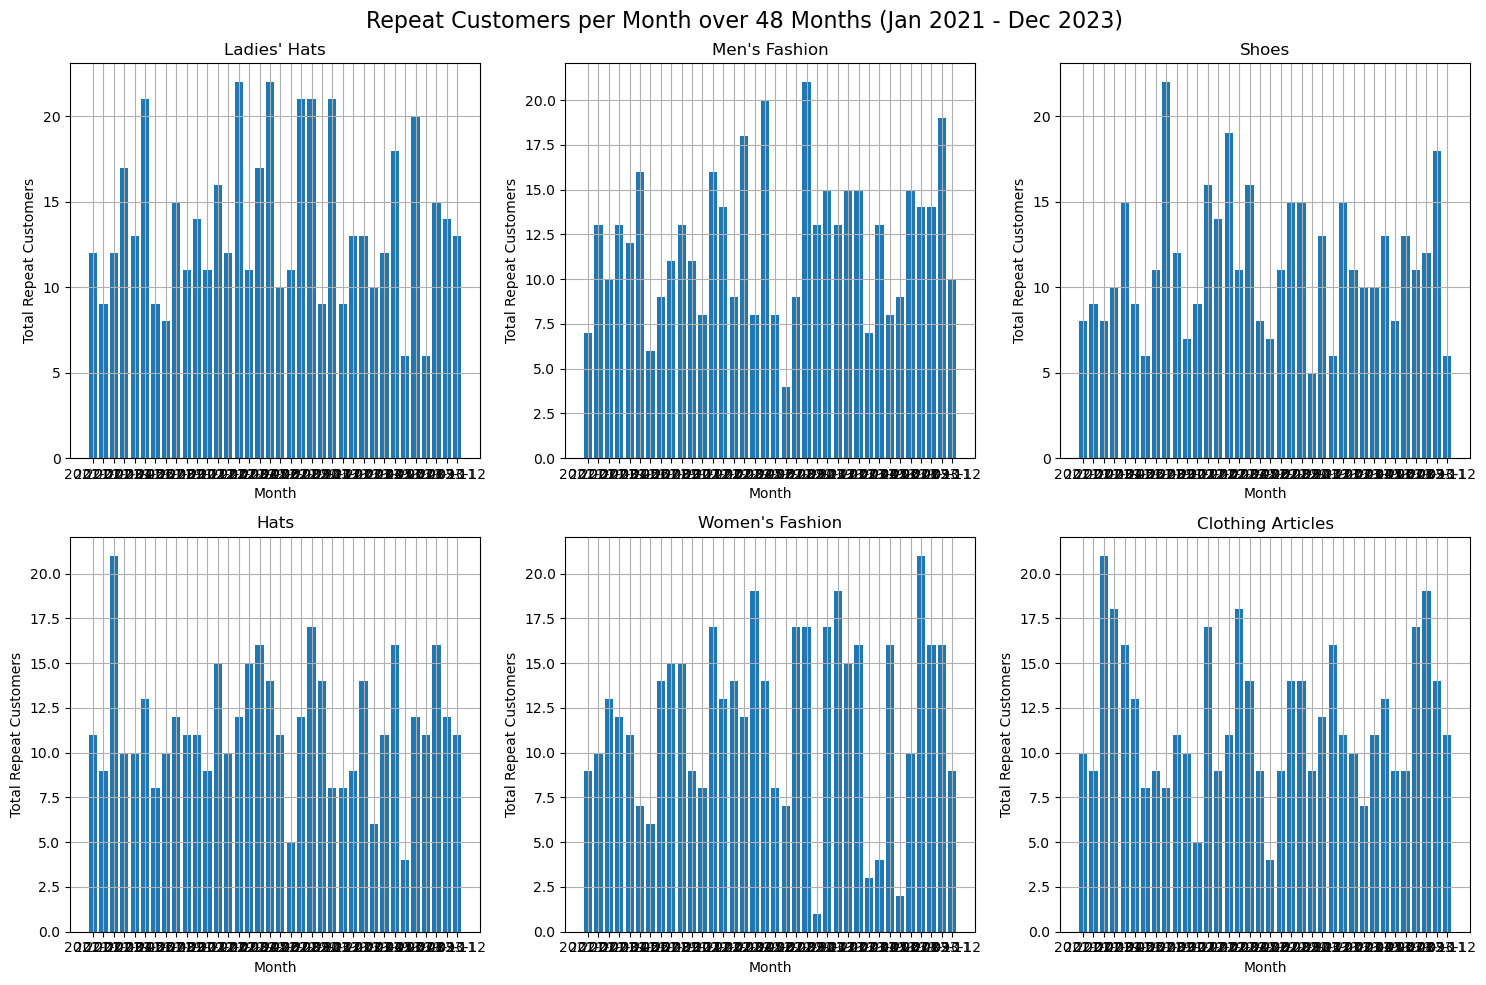

In [103]:
# Get the unique categories
unique_categories = sales_df['Clean Category'].unique()

# Define the desired date range (inclusive) - adjust for 48 months
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-12-31')  # Adjust for 48 months

# Create a figure with 2 rows and 3 columns (6 charts)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust figure size as needed

# Loop through each category and subplot
for i, category in enumerate(unique_categories):
    # Filter data for the current category and date range
    category_data = sales_df[
        (sales_df['Clean Category'] == category) & (sales_df['Date'] >= start_date) & (sales_df['Date'] < end_date)
    ]

    # Resample data by month and sum repeat customers
    monthly_repeat_customers = category_data.resample('M', on='Date')['Repeat Customers'].sum()

    # Convert the index (dates) to strings for the x-axis labels
    monthly_repeat_customers.index = monthly_repeat_customers.index.strftime('%Y-%m')

    # Plot the bar chart on the current subplot
    axes[i // 3, i % 3].bar(monthly_repeat_customers.index, monthly_repeat_customers.values)

    # Add labels and title for each subplot
    axes[i // 3, i % 3].set_xlabel('Month')
    axes[i // 3, i % 3].set_ylabel('Total Repeat Customers')
    axes[i // 3, i % 3].set_title(f'{category}')
    axes[i // 3, i % 3].grid(True)

# Adjust overall layout (optional)
fig.suptitle('Repeat Customers per Month over 48 Months (Jan 2021 - Dec 2023)', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [105]:
# Focus on specific columns
selected_columns = ['Age Group', 'Region', 'Race/Ethnicity', 'Income Group', 'Language']
data_types = sales_df[selected_columns].dtypes

# Print the results
print(data_types)

Age Group         object
Region            object
Race/Ethnicity    object
Income Group      object
Language          object
dtype: object


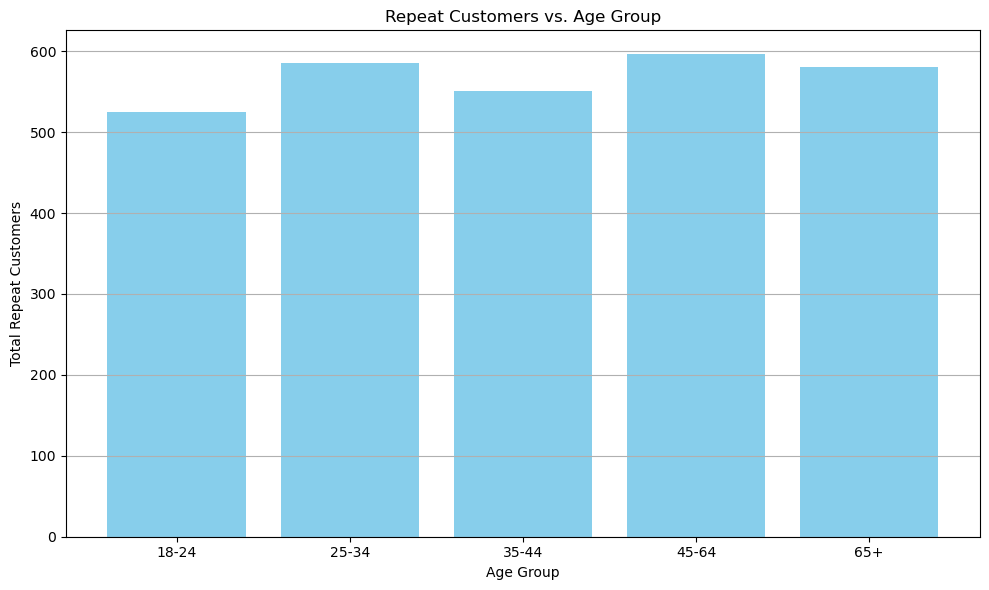

In [112]:
# Define age groups (modify if needed)
age_groups = ['18-24', '25-34', '35-44', '45-64', '65+']

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))

# Group data by "Age Group" and aggregate "Repeat Customers" sum
age_group_data = (
    sales_df.groupby("Age Group")["Repeat Customers"].sum().reset_index()
)

# Create bars for each age group
plt.bar(age_group_data["Age Group"], age_group_data["Repeat Customers"], color='skyblue')

# Add labels, title, and grid
plt.xlabel("Age Group")
plt.ylabel("Total Repeat Customers")
plt.title("Repeat Customers vs. Age Group")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines for better readability

# Display the plot
plt.tight_layout()  # Adjust layout for better presentation
plt.show()

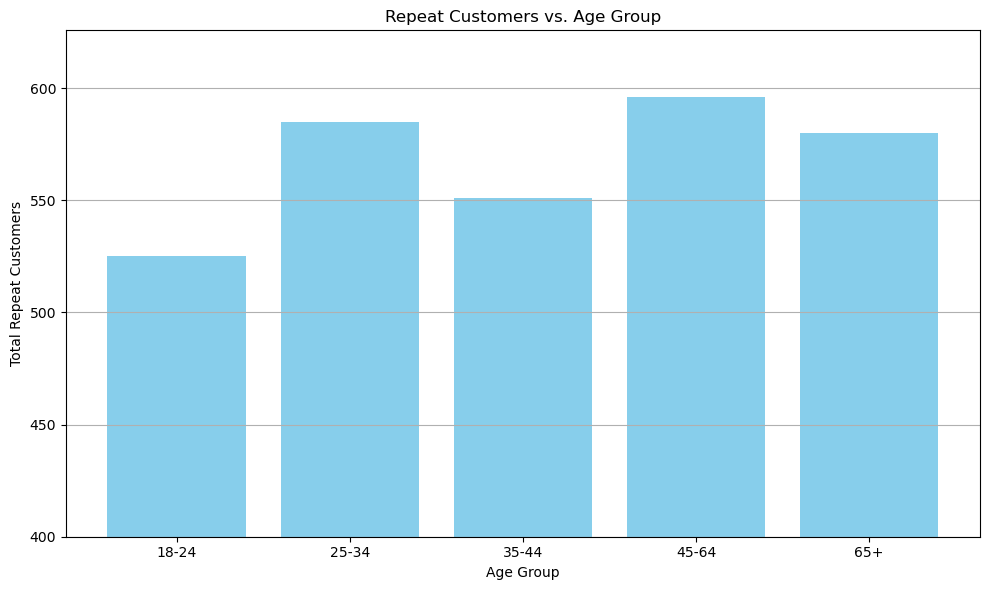

In [114]:
# Define age groups (modify if needed)
age_groups = ['18-24', '25-34', '35-44', '45-64', '65+']

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))

# Group data by "Age Group" and aggregate "Repeat Customers" sum
age_group_data = (
    sales_df.groupby("Age Group")["Repeat Customers"].sum().reset_index()
)

# Create bars for each age group
plt.bar(age_group_data["Age Group"], age_group_data["Repeat Customers"], color='skyblue')

# Adjust y-axis limits (starting at 300)
plt.ylim(bottom=400)  # Change the value as needed

# Add labels, title, and grid
plt.xlabel("Age Group")
plt.ylabel("Total Repeat Customers")
plt.title("Repeat Customers vs. Age Group")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines for better readability

# Display the plot
plt.tight_layout()  # Adjust layout for better presentation
plt.show()